In [34]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

matplotlib.rcParams['text.usetex'] = True


In [35]:
path = r'C:\Users\jonat\OneDrive\Documents\programming\AnacondaProjects\PHYS437A\dmrg\output_data\mmax=5_moreg\data.csv'

df = pd.read_csv(path)
df

,mmax,Nsites,interaction,basis,E_angle,E_strength,g,energy,vN,renyi,mux,muy,xcorr,ycorr,corr
0,5,10,nearest,all,1.570796,0.0,0.0,3.552714e-15,0.000000,-0.000000,2.533643e-09,-3.779384e-25,8.620637e-23,4.107208e-55,9.578486e-24
1,5,10,nearest,all,1.570796,0.0,0.1,-5.637013e-02,0.022977,0.003173,-5.954601e-10,-1.391988e-26,4.537481e-01,-2.223394e-01,2.571208e-02
2,5,10,nearest,all,1.570796,0.0,0.2,-2.270054e-01,0.077027,0.013351,7.026012e-07,-5.158082e-25,9.314897e-01,-4.282382e-01,5.591683e-02
3,5,10,nearest,all,1.570796,0.0,0.3,-5.171574e-01,0.159929,0.033362,-1.014920e-06,-5.602295e-25,1.465680e+00,-5.986412e-01,9.633759e-02
4,5,10,nearest,all,1.570796,0.0,0.4,-9.382732e-01,0.285418,0.072663,-4.634372e-06,-5.396986e-23,2.110280e+00,-7.080621e-01,1.558020e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,5,10,nearest,all,1.570796,0.0,29.5,-4.590422e+02,0.723953,0.351408,-1.160501e-03,-9.981361e-18,8.245199e+00,-1.054432e-01,9.044173e-01
296,5,10,nearest,all,1.570796,0.0,29.6,-4.607019e+02,0.723952,0.351408,-1.171732e-03,-2.133242e-18,8.245838e+00,-1.053316e-01,9.045007e-01
297,5,10,nearest,all,1.570796,0.0,29.7,-4.623616e+02,0.723951,0.351408,-1.183735e-03,4.643005e-17,8.246472e+00,-1.052208e-01,9.045835e-01
298,5,10,nearest,all,1.570796,0.0,29.8,-4.640215e+02,0.723950,0.351408,-1.196446e-03,-2.685241e-17,8.247102e+00,-1.051106e-01,9.046657e-01


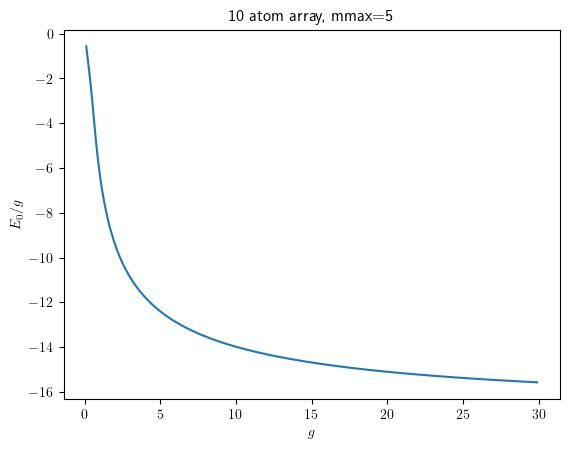

In [6]:
plt.plot(df['g'], df['energy']/df['g'])
plt.xlabel('$g$')
plt.ylabel("$E_0/g$")
plt.title("10 atom array, mmax=5")
plt.show()

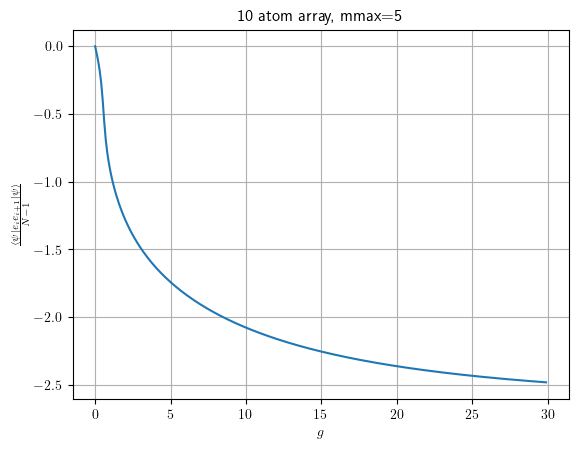

In [13]:
plt.plot(df['g'], df['xcorr']/(df['Nsites']-1))
plt.xlabel('$g$')
plt.ylabel(r"$\frac{\langle \psi |e_i e_{i+1}|\psi \rangle}{N-1}$")
plt.title("10 atom array, mmax=5")
# plt.ylim([0,1])
plt.grid()
plt.show()

## ED analysis

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

filename = r"C:\Users\jonat\OneDrive\Documents\programming\AnacondaProjects\PHYS437A\dmrg\output_data\ED_benchmark.csv"
df = pd.read_csv(filename)


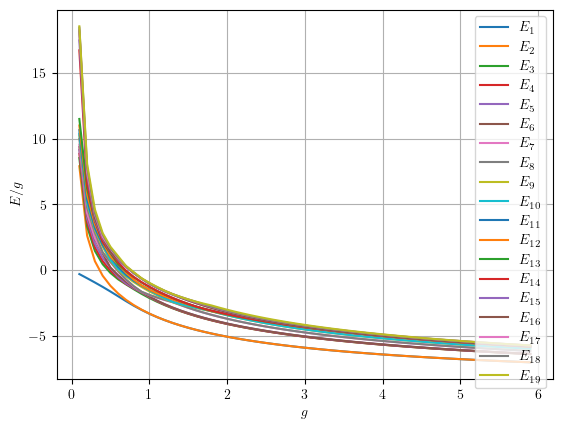

In [38]:
filt = (df['Nsites'] == 6) & (df['mmax'] == 5) & (df['g'] < 10)
tmp = df[filt].sort_values(by='g')
for i in range(1,20):
    plt.plot(tmp['g'], tmp[f'E{i}']/tmp['g'], label=r"$E_{%i}$"%i)
plt.xlabel("$g$")
plt.ylabel("$E/g$")
plt.legend()
plt.grid()
plt.show()

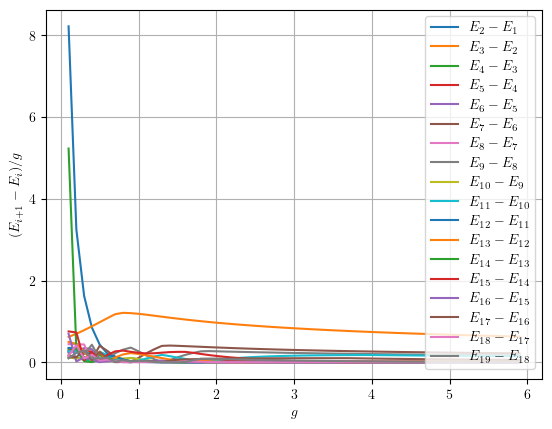

In [40]:
filt = (df['Nsites'] == 6) & (df['mmax'] == 5) & (df['g'] < 10)
tmp = df[filt].sort_values(by='g')
for i in range(1,19):
    plt.plot(tmp['g'], (tmp[f'E{i+1}'] - tmp[f'E{i}'])/tmp['g'], label="$E_{%i}-E_{%i}$"%(i+1,i))
plt.xlabel("$g$")
plt.ylabel("$(E_{i+1}-E_i)/g$")
plt.legend()
plt.grid()
plt.show()